In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset_train = pd.read_csv("D:/Deep_Learning/Part 3 - Recurrent Neural Networks/Google_stock_price_train.csv")

In [5]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
training_set = dataset_train.iloc[:, 1:2].values

In [4]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range= (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [7]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [8]:
x_train = []
y_train = []
for i in range(60, 1258):
    x_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
print(x_train)

[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]


In [10]:
print(y_train)

[0.08627874 0.08471612 0.07454052 ... 0.95725128 0.93796041 0.93688146]


In [11]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [13]:
print(x_train)

[[[0.08581368]
  [0.09701243]
  [0.09433366]
  ...
  [0.07846566]
  [0.08034452]
  [0.08497656]]

 [[0.09701243]
  [0.09433366]
  [0.09156187]
  ...
  [0.08034452]
  [0.08497656]
  [0.08627874]]

 [[0.09433366]
  [0.09156187]
  [0.07984225]
  ...
  [0.08497656]
  [0.08627874]
  [0.08471612]]

 ...

 [[0.92106928]
  [0.92438053]
  [0.93048218]
  ...
  [0.95475854]
  [0.95204256]
  [0.95163331]]

 [[0.92438053]
  [0.93048218]
  [0.9299055 ]
  ...
  [0.95204256]
  [0.95163331]
  [0.95725128]]

 [[0.93048218]
  [0.9299055 ]
  [0.93113327]
  ...
  [0.95163331]
  [0.95725128]
  [0.93796041]]]


In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [15]:
regressor =  Sequential()

In [16]:
regressor.add(LSTM(units = 50, return_sequences= True, input_shape = (x_train.shape[1], 1)))

In [17]:
regressor.add(Dropout(0.2))

In [18]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [19]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [20]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [21]:
regressor.add(Dense(units = 1))

In [22]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [24]:
regressor.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 6s 43ms/step - loss: 0.0391
Epoch 2/100
38/38 [==============================] - 2s 43ms/step - loss: 0.0064
Epoch 3/100
38/38 [==============================] - 2s 44ms/step - loss: 0.0057
Epoch 4/100
38/38 [==============================] - 2s 44ms/step - loss: 0.0050
Epoch 5/100
38/38 [==============================] - 2s 45ms/step - loss: 0.0052
Epoch 6/100
38/38 [==============================] - 2s 44ms/step - loss: 0.0052
Epoch 7/100
38/38 [==============================] - 2s 44ms/step - loss: 0.0046
Epoch 8/100
38/38 [==============================] - 2s 44ms/step - loss: 0.0045
Epoch 9/100
38/38 [==============================] - 2s 43ms/step - loss: 0.0040
Epoch 10/100
38/38 [==============================] - 2s 43ms/step - loss: 0.0043
Epoch 11/100
38/38 [==============================] - 2s 44ms/step - loss: 0.0042
Epoch 12/100
38/38 [==============================] - 2s 43ms/step - loss: 0.0053
Epoch 13/100
38/38 [=====

In [26]:
dataset_test = pd.read_csv('D:/Deep_Learning/Part 3 - Recurrent Neural Networks/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [27]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

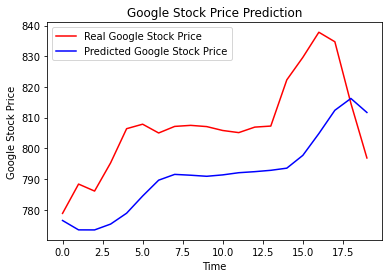

In [28]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()